# Part 1 - Reading in the data

## Part 1.1

In [668]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the data files
DATA_PATH = './data'
fn = f'{DATA_PATH}/SCE*.csv'

dfs=[]

# Loop through files and read them into a list of DataFrames
for i in glob.glob(fn):
    d = pd.read_csv(i, parse_dates=['date'],sep=';')
    dfs.append(d)

# Concatenate all DataFrames into a single DataFrame, and convert 'date' column to datetime
df_original = pd.concat(dfs)

## Part 1.2

In [669]:
def overview_stats(data):

    # Finding number of unique users
    unique_ids = data['userid'].nunique()
    print(f'Number of unique users: {unique_ids}')

    # Finding number of data rows
    data_rows = data.shape[0]
    print(f'Number of data rows: {data_rows}')

    # Finding number of unique waves
    unique_waves = data['wid'].nunique()
    print(f'Number of unique waves: {unique_waves}')

    # Finding date range
    first_date = data['date'].min()
    last_date = data['date'].max()

    # Printing first and last dates observed
    print(f'Data ranges from {first_date.date()} to {last_date.date()}')
    
    return None

overview_stats(df_original)

Number of unique users: 23369
Number of data rows: 176101
Number of unique waves: 139
Data ranges from 2013-06-01 to 2024-12-31


# Part 2

## Part 2.1

In [670]:
# Sort by 'userid' and 'date'
# Creating new dataframe (df) to avoid modifying original dataframe (df_original)

df = df_original.sort_values(["userid", "date"], ignore_index=True)

#Could have looped through columns but this is clearer
num_cols = [c for c in df.columns if "num_lit_" in c and "_correct" in c]

# Fill missing values with the first observed value per user
first_values_per_user = df.groupby("userid")[num_cols].transform("first")
df[num_cols] = df[num_cols].fillna(first_values_per_user)
df

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70000220,201306,2013-06-04,16.3,1.0,3.0,28.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
1,70000224,201306,2013-06-03,0.2,0.0,4.0,65.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
2,70000234,201306,2013-06-17,4.1,1.0,3.0,41.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
3,70000238,201306,2013-06-13,3.0,0.0,3.0,74.0,0.0,0.0,1.0,...,10.0,1.0,1.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN
4,70000238,201307,2013-07-10,1.9,0.0,3.0,74.0,0.0,0.0,NaN,...,NaN,1.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0
176097,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176098,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0


## Part 2.2 (Need improvements)

In [671]:
# Dropping rows with missing values in specified subsets of columns
demo = ['age', 'female', 'educ']
expectation = ['inflation', 'house_price_change', 'prob_stocks_up']

subsets = [
    ("demo", demo),
    ("expectation", expectation),
    ("numeracy", num_cols)
]

total = 0

for name, ss in subsets:
    before = df.shape[0]
    df = df.dropna(subset=ss, ignore_index=True)
    after = df.shape[0]
    total += (before - after)
    print(f"Numbers before dropping NAs for {name}: {before}, after: {after}, dropped: {before - after}")

print(f'\nTotal rows dropped: {total}')

Numbers before dropping NAs for demo: 176101, after: 175233, dropped: 868
Numbers before dropping NAs for expectation: 175233, after: 173550, dropped: 1683
Numbers before dropping NAs for numeracy: 173550, after: 137576, dropped: 35974

Total rows dropped: 38525


## Part 2.3

In [672]:
# Creating a function to drop observations below 0.1th and above 99.9th percentile for each expectation variable
def drop_outliers(data, columns):
    for col in columns:

        # Calculate percentiles and find number of rows before dropping
        before = data.shape[0]
        low = data[col].quantile(0.001)
        high = data[col].quantile(0.999)

        # Filter data to keep only rows within the percentile range, and calculate number of dropped rows
        data = data.query(f"{col} > {low} and {col} < {high}")
        dropped = before - data.shape[0]

        # Print results
        print(f"{col.capitalize()}: 0.1th percentile = {low}, 99.9th percentile = {high}")
        print(f"Observations dropped for {col}: {dropped}\n")
    
    # Return the cleaned data without outliers
    return data

drop_outliers(df, expectation)

Inflation: 0.1th percentile = -75.0, 99.9th percentile = 100.0
Observations dropped for inflation: 434

House_price_change: 0.1th percentile = -50.0, 99.9th percentile = 100.0
Observations dropped for house_price_change: 418

Prob_stocks_up: 0.1th percentile = 0.0, 99.9th percentile = 100.0
Observations dropped for prob_stocks_up: 2456



,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,10.0,1.0,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0
1,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2,70057321,201505,2015-05-11,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0
3,70057321,201506,2015-06-20,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,70057321,201507,2015-07-22,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137571,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0
137572,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
137573,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
137574,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0


## Part 2.4

In [673]:
# Creating a dummy variable for bachelors degree
df['college'] = (df['educ'] == 4).astype(int)

## Part 2.5

In [674]:
num_correct = df.groupby("userid")[num_cols].first().sum(axis=1)

# value counts normalized to fractions
fraction = num_correct.value_counts(normalize=True).sort_index() * 100

# display results
summary = fraction.rename("percent").reset_index().rename(columns={"index": "num_correct"})
print(summary)

   num_correct    percent
0          0.0   0.146727
1          1.0   0.727991
2          2.0   2.404063
3          3.0   5.727991
4          4.0  10.519187
5          5.0  16.930023
6          6.0  27.409707
7          7.0  36.134312


In [675]:
#Create a new column num_lit_high (“high numerical literacy”) equal to 1 if an individual had
#more correct responses than the median, and 0 otherwise."
median_num_correct = num_correct.median()
num_lit_high = (num_correct > median_num_correct).astype(int)

# add it to the dataframe by userid
df['num_lit_high'] = df['userid'].map(num_lit_high)

df

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct,college,num_lit_high
0,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0,1,0
1,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,1
2,70057321,201505,2015-05-11,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1,1
3,70057321,201506,2015-06-20,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1,1
4,70057321,201507,2015-07-22,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137571,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0,0,0
137572,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,0
137573,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,0,1
137574,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0,0,0


## Part 2.6

In [676]:
#Use function to print overview statistics of cleaned data
overview_stats(df)

Number of unique users: 17720
Number of data rows: 137576
Number of unique waves: 117
Data ranges from 2015-04-02 to 2024-12-31


# Part 3

## Part 3.1

In [682]:
def analyze_expectations_by_group(data, group_var, group_labels):
    """
    Calculate average expectations by group.
    
    Parameters:
    - data: DataFrame containing the data
    - group_var: string, column name for grouping ('female', 'college', 'num_lit_high')
    - group_labels: tuple of strings for group labels
    """
    # Calculate means for each expectation variable by group
    means = data.groupby(group_var)[expectation].mean()
    
    # Rename index values to more descriptive labels
    means.index = group_labels
    
    # Round to 2 decimal places for cleaner output
    means = means.round(1)
    
    print(f"\nAverage Expectations by {group_var.capitalize()}:")
    return means

In [701]:
def plot_expectations_by_group(data, group_var, group_labels, title):
    """
    Create bar plots of expectations by group with specific y-axis ranges.
    """
    # Create figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(13, 5))
    fig.suptitle(f'{title}', fontsize=14)

    # Define y-axis ranges for each expectation variable
    ylims = {
        'inflation': (0, 15),
        'house_price_change': (0, 15),
        'prob_stocks_up': (0, 100)
    }

    # Use the analyze_expectations_by_group function to get means for all expectation vars
    means_df = analyze_expectations_by_group(data, group_var, group_labels)

    for i in range(3):
        expectation_var = expectation[i]

        # Extract the series of means for the current expectation variable
        means = means_df[expectation_var]

        # Create bar plot
        axes[i].bar(group_labels, means.values, color=['skyblue', 'salmon'])
        axes[i].set_title(expectation_var.replace('_', ' ').capitalize())
        axes[0].set_ylabel('Predicted Growth (%)')
        axes[1].set_ylabel('Predicted Growth (%)')
        axes[2].set_ylabel('Probability in %')
        axes[i].set_ylim(ylims[expectation_var])  # Set specific y-axis range
        for n, value in enumerate(means.values):
            axes[i].text(n, value + (ylims[expectation_var][1] * 0.02), f'{value}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


Average Expectations by Female:


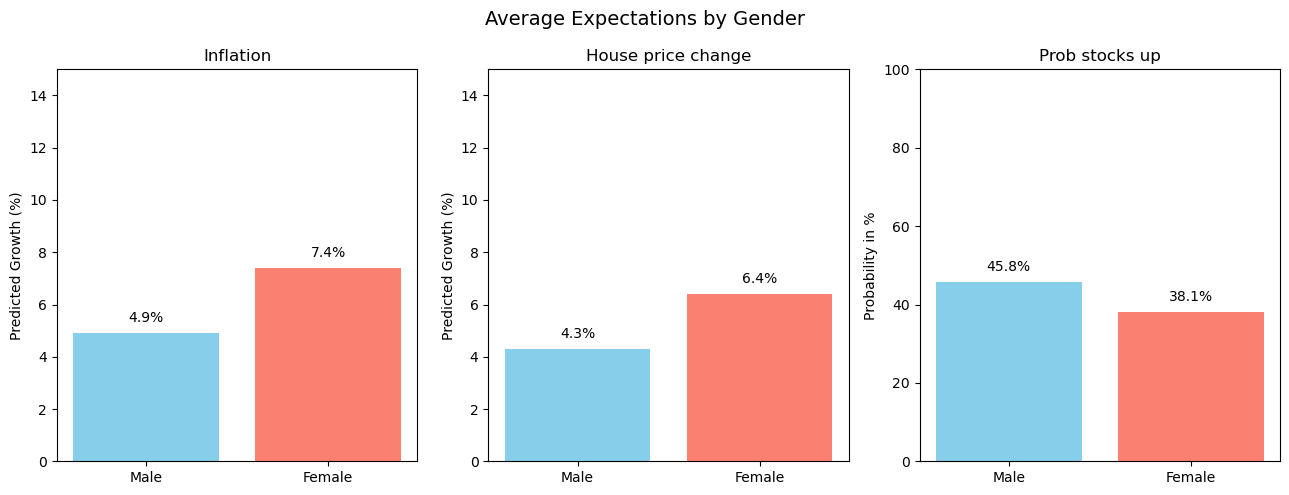

In [702]:
# Plot expectations by gender
plot_expectations_by_group(df, 'female', ('Male', 'Female'), "Average Expectations by Gender")


Average Expectations by College:


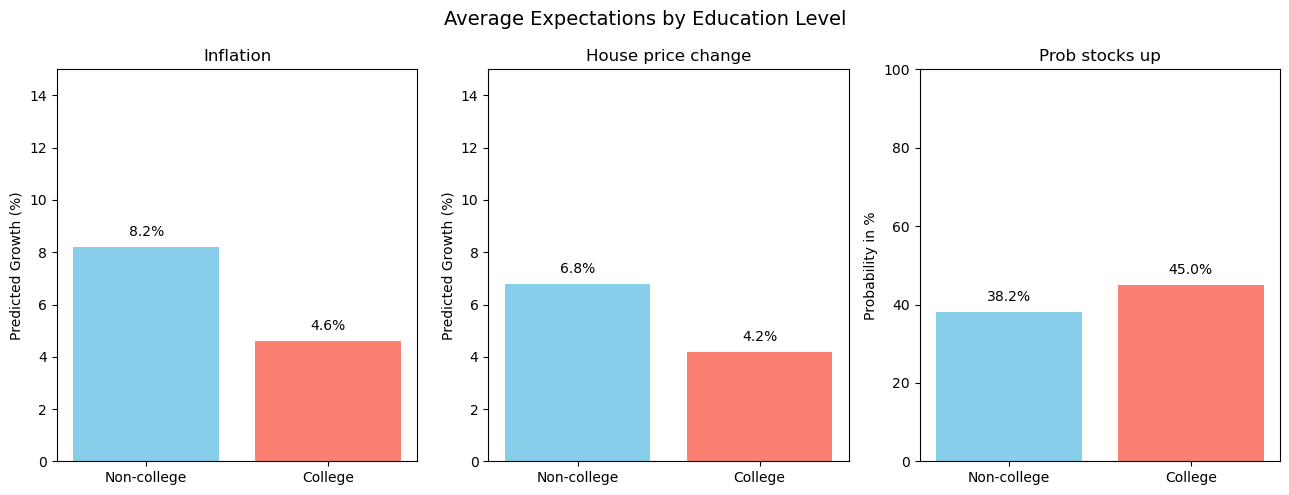

In [703]:
plot_expectations_by_group(df, 'college', ('Non-college', 'College'), 'Average Expectations by Education Level')


Average Expectations by Num_lit_high:


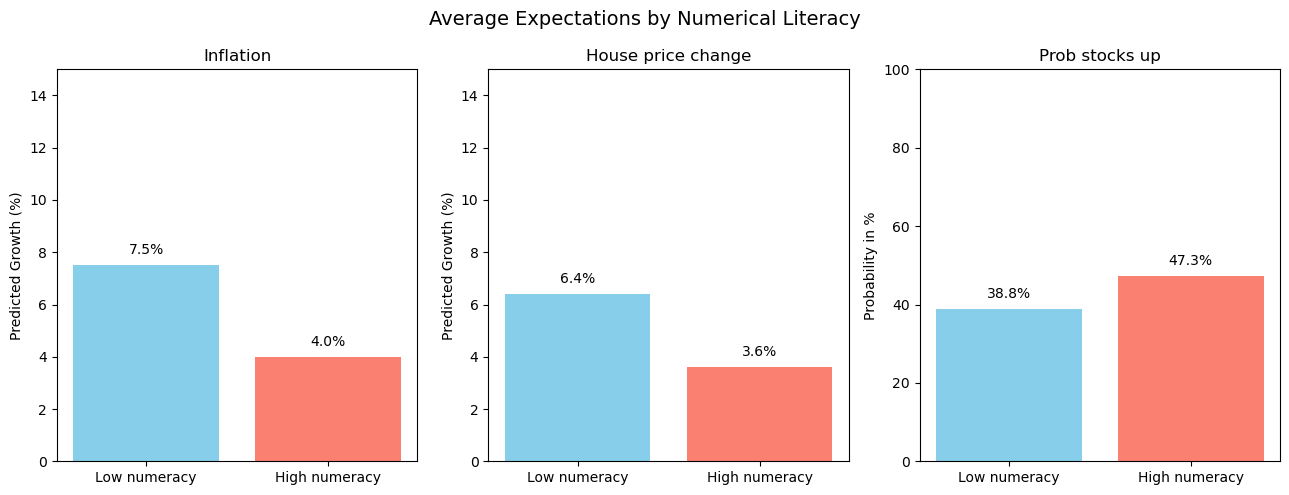

In [704]:
plot_expectations_by_group(df, 'num_lit_high', ('Low numeracy', 'High numeracy'), 'Average Expectations by Numerical Literacy')

## Conclusion: Task 3 — How do expectations differ by gender, education, and numeracy?

The results reveal consistent differences in expectations across groups.

---

#### **Gender**
As shown in the graph, women expect around 7.4% inflation and 6.4% house price growth, compared to men's 4.9% and 4.3%, respectively. They also assign a lower probability (≈38%) that stocks will rise versus men (≈45%). This indicates that women are generally more concerned about rising prices and more cautious toward stock market risk.

#### **Education Level**
The graph shows that non-college respondents expect about 8% inflation and 7% house price growth, while college-educated individuals predict around 4.5% and 4%. College-educated respondents also expect a higher 45% probability that stocks will increase, compared to 38% for non-college participants. This suggests that higher education is linked to more moderate and economically grounded expectations.

#### **Literacy Level**
As shown in the graph, people with low numeracy expect around 7.5% inflation and 6.4% house price growth, while high-numeracy individuals expect only about 4% and 3.6%, respectively. This likely reflects that people with stronger numerical skills make more realistic, data-based judgments. Similarly, high-numeracy individuals see about a 47% chance of stock prices rising, compared to 39% for low numeracy, suggesting they better understand market probabilities.

---

### Summary

Overall, people with higher numeracy or education have more moderate and realistic expectations: lower predicted inflation and house price growth but higher confidence in the stock market. In contrast, those with lower numeracy, less education, or women expect higher prices and show more caution toward financial risk.